### **Actividad Semanal #6**

* Nombre: Rafael J. Mateo C
* Matrícula: A01793054
* Materia: Ciencia y Analítica de Datos
* Profesor: María de la Paz
* Fecha: 7 Nov 2022


Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]].copy()

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

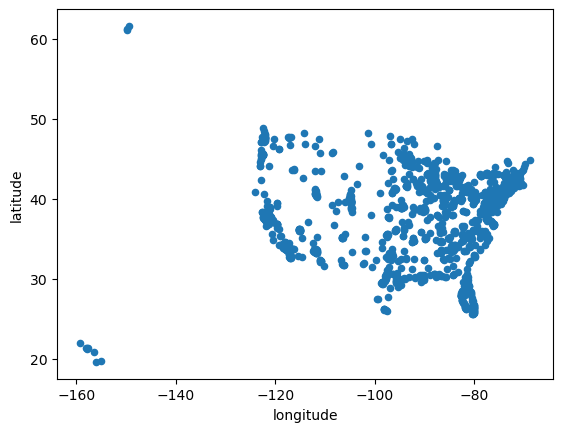

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
# import qeds
# qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

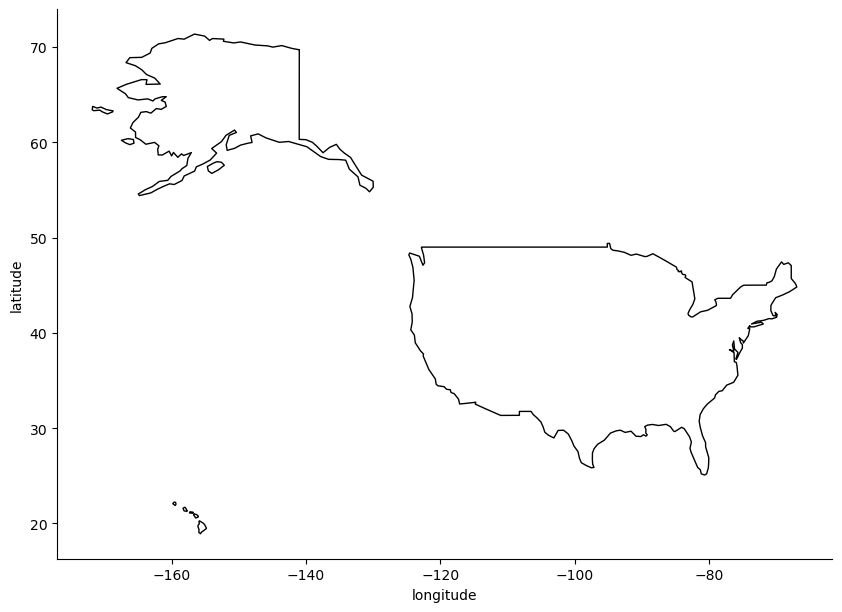

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

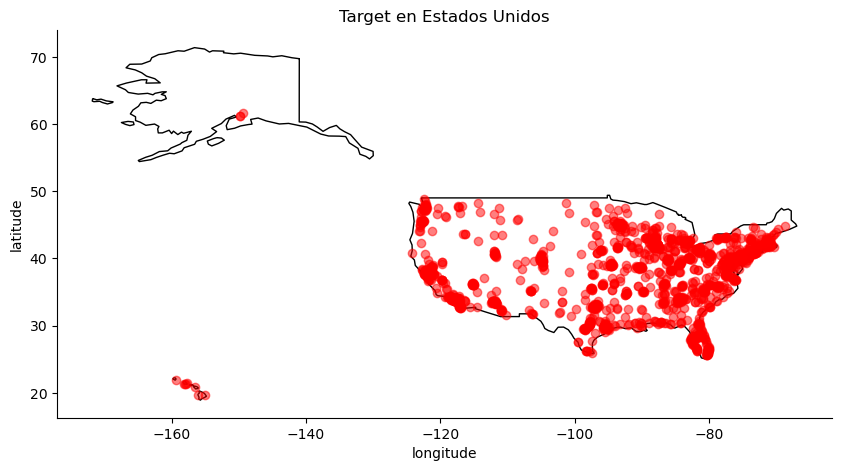

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

### **Búsqueda del número óptimo de almacenes**

Ahora implementemos el kmeans para buscar el número óptimo de almacenes. Empecemos primero entrenando varios modelos de kmeans con diferentes números de clústeres.

In [16]:
from sklearn.cluster import KMeans

#Probemos con hasta 15 clústeres
K = range(1,15)

#Almacenaremos los errores cuadráticos de cada clúster
wss = []

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    
    #Entrenamos el modelo
    kmeans = kmeans.fit(latlong)
    #Almacenamos la inercia, o bien, la suma de los cuadrados del cluster
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)


Ahora obtengamos los centros de cada clúster y pongámoslo dentro de un dataframe

In [17]:
    
centers = pd.DataFrame({'Clusters': K, 'WSS': wss})
centers

,Clusters,WSS
0,1,527995.443069
1,2,171146.625996
2,3,104757.409018
3,4,82987.937724
4,5,62083.344662
5,6,46975.573435
6,7,38600.094191
7,8,31640.580301
8,9,25663.679126
9,10,22442.712109


El próximo paso consiste en buscar el número óptimo de clústeres. Para esto usaremos dos métodos: El método del codo y el método de las siluetas. Comencemos primero con el método del codo.

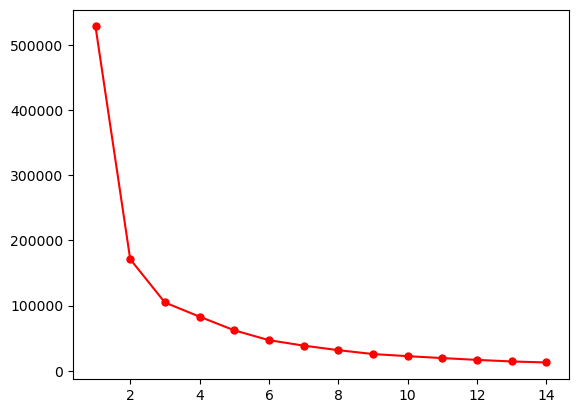

In [18]:
import seaborn as sns

#Graficamos cada clústeres con sus sumas cuadráticas
plt.plot(centers.Clusters, centers.WSS, 'ro-', markersize = 5)

El método del codo consiste en ubicar el número donde se forma un codo en el gráfico. Este número sería nuestro valor óptimo de clústeres. Para este caso se observa que el valor óptimo es de 3 clústeres.

Ahora apliquemos el método de las siluetas.

In [19]:
import sklearn.metrics as metrics

#Empezamos a partir del segundo clúster
for i in range(2,15):
    #Entrenamos nuevamente el modelo para obtener el score de cada uno de ellos
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(latlong).labels_
    #Imprimimos las métricas
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(
               metrics.silhouette_score(
                   latlong,labels,
                   metric="euclidean",
                   sample_size=1000,random_state=200))) 
 

Silhouette score for k(clusters) = 2 is 0.6299987649622539
Silhouette score for k(clusters) = 3 is 0.47114786819856613
Silhouette score for k(clusters) = 4 is 0.4378026408108228
Silhouette score for k(clusters) = 5 is 0.5192796982298434
Silhouette score for k(clusters) = 6 is 0.5323590651619174
Silhouette score for k(clusters) = 7 is 0.5075239608223188
Silhouette score for k(clusters) = 8 is 0.5362463678889792
Silhouette score for k(clusters) = 9 is 0.5401582573037924
Silhouette score for k(clusters) = 10 is 0.5327073478889603
Silhouette score for k(clusters) = 11 is 0.5119847146492725
Silhouette score for k(clusters) = 12 is 0.5114520369541952
Silhouette score for k(clusters) = 13 is 0.49627113508779314
Silhouette score for k(clusters) = 14 is 0.5198387801039602


El resultado anterior nos muestra que el valor óptimo es de dos clústeres, ya que este es el que tiene el score más alto. Esto significa que podemos elegir entre 2 y 3 almacenes. Para este caso vamos a elegir 3 almacenes para minimizar la cantidad de tiendas que estos almacenes les darán respuestas.

In [20]:
#Entrenamos el modelo con 3 clústeres y obtenemos los centros
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(latlong)
kmeans.cluster_centers_

array([[  37.789554  ,  -78.56990807],
       [  37.98006261,  -93.3271723 ],
       [  37.48734203, -118.62447332]])

Ahora generemos un gráfico para visualizar donde ubicaríamos los almacenes

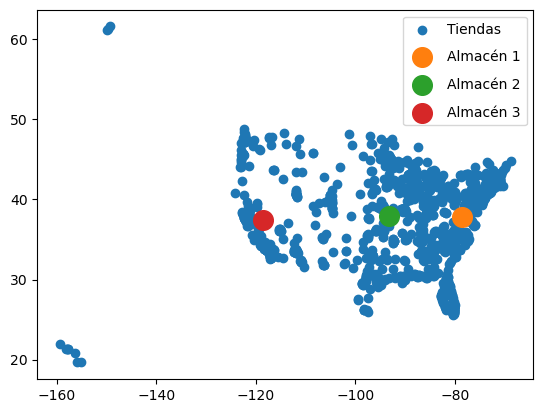

In [21]:


#Obtenemos los centros
centers = kmeans.cluster_centers_
#Obtenemos los clústeres y las etiquetas
clusters = np.unique(kmeans.labels_)
labels = ["Tiendas","Almacén 1", "Almacén 2", "Almacén 3"]

#Mapa de las tiendas
plt.scatter(latlong.longitude, latlong.latitude)

for i,v in enumerate(clusters):
    #Gráfico de los almacenes
    plt.scatter(centers[i][1], centers[i][0], label = i, s=200)


plt.legend(loc = 'upper right', labelspacing = 1,labels = labels)
plt.show()


Como se muestra en el gráfico, los almacenes estarían ubicados en la costa este, midwest y la costa oeste. Ahora veamos la cantidad de tiendas por almacén.

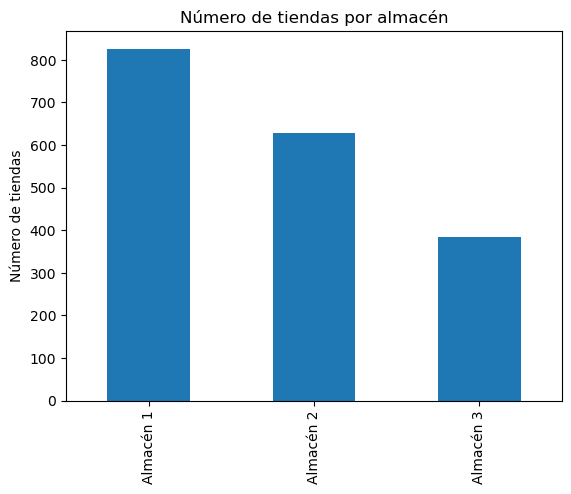

In [22]:
#Nombre de cada clúster
cluster_map = {
    0: 'Almacén 1',
    1: 'Almacén 2',
    2: 'Almacén 3'
}

#Asignamos los clústeres a cada tienda
latlong['kmeans'] = kmeans.labels_
latlong.kmeans = latlong['kmeans'].apply(lambda cluster: cluster_map[cluster])

#Generamos el gráfico
plt.title('Número de tiendas por almacén')
plt.ylabel('Número de tiendas')
latlong.kmeans.value_counts().plot(kind='bar')

plt.show()


Como se observa del gráfico anterior, cada almacén estará dando servicio entre 400 y 800 tiendas aproximadamente. Ahora veamos la distancia promedio de cada tienda a sus almacenes.

In [23]:
#Distancia promedio entre los almacenes y las tiendas
np.sqrt(kmeans.inertia_)

323.6624924486999

#### **Conclusiones**

* Se observa que el valor óptimo de almacenes es 3, los cuales estarían ubicados en la costa este, oeste y el midwest. También se puede observar que cada almacén estaría dando servicio a un total de 400 a 800 tiendas. El valor óptimo de los almacenes fue obtenido por medio del método del codo y análisis de siluetas.
  
* De acuerdo a las coordinadas, estas serían las localides de los almacenes (esto fue realizado en una búsqueda de google maps) 
  
  
| Almacén | Ciudad                   | Coordenadas             |
|---------|--------------------------|-------------------------|
| 1       | Hermitage, Missouri      | 37.9827023,-93.34747643 |
| 2       | Round Valley, California | 37.4817419,-118.657146  |
| 3       | Scottsville, Virginia    | 37.789554,-78.56990807  |

* La distancia promedio de cada tienda a sus almacenes es de unos 323.66 Kms.
  
* Es importante entender las limitaciones de este estudio. Si bien el número óptimo de clústeres es 3, en la realidad se deben considerar otros factores además de la distancia. Por ejemplo, capacidad del almacén, demanda de las zonas, salarios, costo de construcción, valor del solar, etc. Todo estos son factores a tomar en cuenta para decidir la ubicación de los almacenes.
  
* El modelo Kmeans funciona bajo el supuesto de que los clústeres son isotrópicos (uniformes en todas las direcciones, es decir, esféricas) y convexas. Como se observa en el gráfico de correlación, el primer supuesto no se cumple, ya que los clústeres tienen formas muy diferentes.
  
* Con relación a las librerías que existen para graficar mapas se encuentran: Arcpy, Geopandas, GDAL/OGR, PyProj. Es importante generar utilizar mapas para datos geoespaciales para evitar sacar conclusiones erróneas, como por ejemplo la existencia de datos atípicos.